# Large scale text analysis with deep learning (3 points)

Today we're gonna apply the newly learned tools for the task of predicting job salary.

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/3342/media/salary%20prediction%20engine%20v2.png" width=400px>

_Special thanks to [Oleg Vasilev](https://github.com/Omrigan/) for the core assignment idea._

In [1]:
!which python

/home/iris/paulshab/NLP_env/nlp_environ/bin/python


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### About the challenge
For starters, let's download and unpack the data from [here]. 

You can also get it from [yadisk url](https://yadi.sk/d/vVEOWPFY3NruT7) the competition [page](https://www.kaggle.com/c/job-salary-prediction/data) (pick `Train_rev1.*`).

In [2]:
#!wget https://ysda-seminars.s3.eu-central-1.amazonaws.com/Train_rev1.zip
#!unzip Train_rev1.zip
data = pd.read_csv("./Train_rev1.csv", index_col=None)
data.shape

(244768, 12)

In [4]:
data.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


One problem with salary prediction is that it's oddly distributed: there are many people who are paid standard salaries and a few that get tons o money. The distribution is fat-tailed on the right side, which is inconvenient for MSE minimization.

There are several techniques to combat this: using a different loss function, predicting log-target instead of raw target or even replacing targets with their percentiles among all salaries in the training set. We gonna use logarithm for now.

_You can read more [in the official description](https://www.kaggle.com/c/job-salary-prediction#description)._

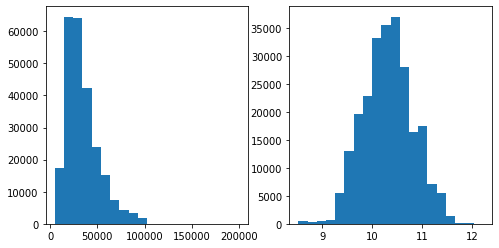

In [5]:
data['Log1pSalary'] = np.log1p(data['SalaryNormalized']).astype('float32')

plt.figure(figsize=[8, 4])
plt.subplot(1, 2, 1)
plt.hist(data["SalaryNormalized"], bins=20);

plt.subplot(1, 2, 2)
plt.hist(data['Log1pSalary'], bins=20);

Our task is to predict one number, __Log1pSalary__.

To do so, our model can access a number of features:
* Free text: __`Title`__ and  __`FullDescription`__
* Categorical: __`Category`__, __`Company`__, __`LocationNormalized`__, __`ContractType`__, and __`ContractTime`__.

In [6]:
text_columns = ["Title", "FullDescription"]
categorical_columns = ["Category", "Company", "LocationNormalized", "ContractType", "ContractTime"]
TARGET_COLUMN = "Log1pSalary"

data[categorical_columns] = data[categorical_columns].fillna('NaN') # cast missing values to string "NaN"

data.sample(3)

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,Log1pSalary
8879,65444731,CNC Millers & Turners Needed,CNC Millers CNC Turner Needed Neg per hour M...,Milton Keynes Buckinghamshire South East,Milton Keynes,NaN,permanent,Alecto Recruitment,Engineering Jobs,22000 - 35000 per annum,28500,totaljobs.com,10.257694
177656,71552758,Second in Department Maths,Second in Faculty Mathematics MPS/UPS TLR **...,Barnsley,Barnsley,NaN,NaN,Hays Sheffield,Teaching Jobs,21500.00 - 46500.00 per annum + TLR 1c,34000,MyUkJobs,10.434145
131728,70205178,Sales Advisor,Job Reference: **** Hours of work: 40 Days of ...,Cambridge,Cambridge,full_time,NaN,British Sky Broadcasting Ltd,Sales Jobs,"28,000.00 per year",28000,Jobcentre Plus,10.239996


### Preprocessing text data

Just like last week, applying NLP to a problem begins from tokenization: splitting raw text into sequences of tokens (words, punctuation, etc).

__Your task__ is to lowercase and tokenize all texts under `Title` and `FullDescription` columns. Store the tokenized data as a __space-separated__ string of tokens for performance reasons.

It's okay to use nltk tokenizers. Assertions were designed for WordPunctTokenizer, slight deviations are okay.

In [6]:
print("Raw text:")
print(data["FullDescription"][2::100000])

Raw text:
2         Mathematical Modeller / Simulation Analyst / O...
100002    A successful and high achieving specialist sch...
200002    Web Designer  HTML, CSS, JavaScript, Photoshop...
Name: FullDescription, dtype: object


In [7]:
def tokenize_and_to_lower(Series):
    new_series = []
    
    for row in Series:
        row = str(row)
        row = row.lower()
        my_string = ' '.join(tokenizer.tokenize(row))
        new_series.append(my_string)
    return new_series

In [8]:
import nltk
#TODO YOUR CODE HERE

from nltk import tokenize
from nltk.tokenize import WordPunctTokenizer

#nltk.download('stopwords')
#nltk.download('punkt')

tokenizer = nltk.tokenize.WordPunctTokenizer()

# YOUR CODE HERE
data["FullDescription"] = tokenize_and_to_lower(data["FullDescription"])
data["Title"] = tokenize_and_to_lower(data["Title"])

#tokenize_and_to_lower(data["FullDescription"][2::100000])
#new_series = tokenize_and_to_lower(data["FullDescription"])

Now we can assume that our text is a space-separated list of tokens:

In [9]:
print("Tokenized:")
print(data["FullDescription"][2::100000])
assert data["FullDescription"][2][:50] == 'mathematical modeller / simulation analyst / opera'
assert data["Title"][54321] == 'international digital account manager ( german )'

Tokenized:
2         mathematical modeller / simulation analyst / o...
100002    a successful and high achieving specialist sch...
200002    web designer html , css , javascript , photosh...
Name: FullDescription, dtype: object


Not all words are equally useful. Some of them are typos or rare words that are only present a few times. 

Let's count how many times is each word present in the data so that we can build a "white list" of known words.

In [9]:
def count_dict(x):
    values = {}
    for row in tqdm.tqdm(x):
        vals = row.split()
        for val in vals:
            if val not in values:
                values[val] = 1
            else:
                values[val] += 1
    return values

In [10]:
from collections import Counter
import tqdm

# Count how many times does each token occur in both "Title" and "FullDescription" in total

token_counts = count_dict(data["FullDescription"] + data["Title"])
token_counts = Counter(token_counts)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 244768/244768 [00:12<00:00, 19020.48it/s]


In [92]:
len(token_counts)

253743

In [11]:
print("Total unique tokens :", len(token_counts))
print('\n'.join(map(str, token_counts.most_common(n=5))))
print('...')
print('\n'.join(map(str, token_counts.most_common()[-3:])))

assert token_counts.most_common(1)[0][1] in  range(2600000, 2700000)
#assert len(token_counts) in range(200000, 210000)
print('Correct!')

Total unique tokens : 253743
('and', 2657309)
('.', 2453599)
(',', 2317992)
('the', 2080902)
('to', 2018611)
...
('stephanietraveltraderecruitmnt', 1)
('ruabon', 1)
('lowehays', 1)
Correct!


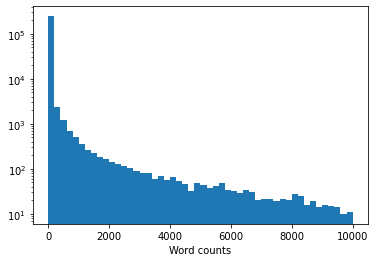

In [12]:
# Let's see how many words are there for each count
plt.hist(list(token_counts.values()), range=[0, 10**4], bins=50, log=True)
plt.xlabel("Word counts");

__Task 1.1__ Get a list of all tokens that occur at least 10 times.

In [13]:
min_count = 10

# tokens from token_counts keys that had at least min_count occurrences throughout the dataset
tokens = sorted(t for t, c in token_counts.items() if c >= min_count)#TODO<YOUR CODE HERE>

# Add a special tokens for unknown and empty words
UNK, PAD = "UNK", "PAD"
tokens = [UNK, PAD] + tokens

In [98]:
len(tokens)

36720

In [14]:
print("Vocabulary size:", len(tokens))
assert type(tokens) == list
#assert len(tokens) in range(32000, 35000)
assert 'me' in tokens
assert UNK in tokens
print("Correct!")

Vocabulary size: 36720
Correct!


__Task 1.2__ Build an inverse token index: a dictionary from token(string) to it's index in `tokens` (int)

In [15]:
token_to_id = {t: i for i, t in enumerate(tokens)}
id_to_token = {i: t for i, t in enumerate(tokens)}

In [17]:
assert isinstance(token_to_id, dict)
assert len(token_to_id) == len(tokens)
for tok in tokens:
    assert tokens[token_to_id[tok]] == tok

print("Correct!")

Correct!


And finally, let's use the vocabulary you've built to map text lines into neural network-digestible matrices.

In [16]:
UNK_IX, PAD_IX = map(token_to_id.get, [UNK, PAD])

def as_matrix(sequences, max_len=200):
    """ Convert a list of tokens into a matrix with padding """
    if isinstance(sequences[0], str):
        sequences = list(map(str.split, sequences))
    
    #print(sequences)
    #print(max(list(map(len, sequences)), max_len))
    #print(max(map(len, sequences)), max_len or float('inf'))
    
    
    #max_len = min(max(map(len, sequences)), max_len or float('inf'))
    #max_len = max(max(map(len, sequences)), max_len)
    
    matrix = np.full((len(sequences), max_len), np.int32(PAD_IX))
    for i,seq in enumerate(sequences):
        row_ix = [token_to_id.get(word, UNK_IX) for word in seq[:max_len]]
        matrix[i, :len(row_ix)] = row_ix
    
    return matrix

In [ ]:
"hello how are . . . "

In [17]:
print("Lines:")
print('\n'.join(data["Title"][::100000].values), end='\n\n')
print("Matrix:")
print(as_matrix(data["Title"][::100000], max_len=10))
#print(as_matrix(data["Title"][::100000]))

Lines:
engineering systems analyst
hr assistant
senior ec & i engineer

Matrix:
[[12827 32378  3863     1     1     1     1     1     1     1]
 [17049  4570     1     1     1     1     1     1     1     1]
 [29853 12186    16 17243 12821     1     1     1     1     1]]


Now let's  encode the categirical data we have.

As usual, we shall use one-hot encoding for simplicity. Kudos if you implement more advanced encodings: tf-idf, pseudo-time-series, etc.

In [18]:
from sklearn.feature_extraction import DictVectorizer

# we only consider top-1k most frequent companies to minimize memory usage
top_companies, top_counts = zip(*Counter(data['Company']).most_common(1000))
recognized_companies = set(top_companies)
data["Company"] = data["Company"].apply(lambda comp: comp if comp in recognized_companies else "Other")

categorical_vectorizer = DictVectorizer(dtype=np.float32, sparse=False)
categorical_vectorizer.fit(data[categorical_columns].apply(dict, axis=1))

DictVectorizer(dtype=<class 'numpy.float32'>, sparse=False)

### The deep learning part

Once we've learned to tokenize the data, let's design a machine learning experiment.

As before, we won't focus too much on validation, opting for a simple train-test split.

__To be completely rigorous,__ we've comitted a small crime here: we used the whole data for tokenization and vocabulary building. A more strict way would be to do that part on training set only. You may want to do that and measure the magnitude of changes.

In [19]:
from sklearn.model_selection import train_test_split

data_train, data_val = train_test_split(data, test_size=0.2, random_state=42)
data_train.index = range(len(data_train))
data_val.index = range(len(data_val))

print("Train size = ", len(data_train))
print("Validation size = ", len(data_val))

Train size =  195814
Validation size =  48954


In [20]:
import torch

def to_tensors(batch, device):
    batch_tensors = dict()
    for key, arr in batch.items():
        if key in ["FullDescription", "Title"]:
            batch_tensors[key] = torch.tensor(arr, device=device, dtype=torch.int64)
        else:
            batch_tensors[key] = torch.tensor(arr, device=device)
    return batch_tensors

def make_batch(data, max_len_title=20, max_len_desc=80, word_dropout=0, device=torch.device('cuda:0')):
    """
    Creates a keras-friendly dict from the batch data.
    :param word_dropout: replaces token index with UNK_IX with this probability
    :returns: a dict with {'title' : int64[batch, title_max_len]
    """
    batch = {}
    batch["Title"] = as_matrix(data["Title"].values, max_len_title)
    batch["FullDescription"] = as_matrix(data["FullDescription"].values, max_len_desc)
    batch['Categorical'] = categorical_vectorizer.transform(data[categorical_columns].apply(dict, axis=1))
    
    if word_dropout != 0:
        batch["FullDescription"] = apply_word_dropout(batch["FullDescription"], 1. - word_dropout)
    
    if TARGET_COLUMN in data.columns:
        batch[TARGET_COLUMN] = data[TARGET_COLUMN].values
    
    return to_tensors(batch, device)

def apply_word_dropout(matrix, keep_prop, replace_with=UNK_IX, pad_ix=PAD_IX,):
    dropout_mask = np.random.choice(2, np.shape(matrix), p=[keep_prop, 1 - keep_prop])
    dropout_mask &= matrix != pad_ix
    return np.choose(dropout_mask, [matrix, np.full_like(matrix, replace_with)])

In [21]:
#batch = make_batch(data_train[:5], max_len=10)
batch = make_batch(data_train[:5], max_len_title=20, max_len_desc=80)
print("\n", batch["Title"].shape)
print("\n", batch["FullDescription"].shape)
print("\n", batch["Categorical"].shape)
print("\n", batch[TARGET_COLUMN].shape)


 torch.Size([5, 20])

 torch.Size([5, 80])

 torch.Size([5, 3768])

 torch.Size([5])


#### Architecture

Our basic model consists of three branches:
* Title encoder
* Description encoder
* Categorical features encoder

We will then feed all 3 branches into one common network that predicts salary.

![scheme](https://github.com/yandexdataschool/nlp_course/raw/master/resources/w2_conv_arch.png)

This clearly doesn't fit into keras' __Sequential__ interface. To build such a network, one will have to use PyTorch.

In [22]:
import torch
import torch.nn as nn
import torch.functional as F

In [145]:
print(len(tokens))
len(categorical_vectorizer.vocabulary_)

36720


3768

In [38]:
class SalaryPredictor(nn.Module):
    def __init__(self, max_title=None, max_desc=None,  num_tokens=len(tokens), n_cat_features=len(categorical_vectorizer.vocabulary_), hid_size=64, embedding_size=32):
        super().__init__()
        
        self.title_emb = nn.Embedding(num_tokens, embedding_size)     
        self.desc_emb = nn.Embedding(num_tokens, embedding_size)  
        self.predict = nn.Linear(48, 1)
        
        self.cnn_title = nn.Sequential(
            #nn.Conv2d(1, 3, kernel_size=5, padding=2),            # ( in_channels, out_channels, window_size, )
            nn.Conv1d(max_title, 3, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2),                             # kernel size, stride
        )
        
        self.cnn_dec = nn.Sequential(
            #nn.Conv2d(1, 3, kernel_size=5, padding=2),             # ( in_channels, out_channels, window_size, )
            nn.Conv1d(max_desc, 3, kernel_size=5, padding=2),     
            nn.ReLU(),
            nn.MaxPool2d(2),                             # kernel size, stride
        )
        
        self.cat_enc = nn.Sequential(
            nn.Linear(n_cat_features, 16),
            nn.ReLU(),
            nn.Dropout(p=0.1),
        )
        
    def forward(self, batch):
        # YOUR CODE HERE
        print("title_raw", batch["Title"].shape)
        #title_emb = torch.unsqueeze(self.title_emb(batch["Title"]), 1)
        title_emb = self.title_emb(batch["Title"])
        print("title_emb", title_emb.shape)
        title_tensor = self.cnn_title(title_emb)
        print("title cnn", title_tensor.shape)
        title_tensor = title_tensor.view(title_tensor.size(0), -1)  # flatten
        print("title tensor:", title_tensor.shape)
        
        #print("\ntitle_raw", batch["FullDescription"].shape)
        #desc_emb = torch.unsqueeze(self.desc_emb(batch["FullDescription"]), 1)
        desc_emb = self.desc_emb(batch["FullDescription"])
        #print("desc_emb", desc_emb.shape)
        desc_tensor = self.cnn_dec(desc_emb)
        #print("desc_cnn", desc_tensor.shape)
        desc_tensor = desc_tensor.view(desc_tensor.size(0), -1)  # flatten
        #print("desc_flatten", desc_tensor.shape)
        
        cat_enc_tensor = self.cat_enc(batch["Categorical"])
        #print("\ncat_tensor: ", cat_enc_tensor.shape)
        
        X = torch.cat((title_tensor, desc_tensor, cat_enc_tensor), 1)
        X = self.predict(X)
        
        return torch.squeeze(X)
        
            
        
        

In [42]:
print(len(tokens))
print(batch['Title'])

36720
tensor([[29853, 32112, 36223,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1],
        [31462,  1834, 21250, 22121, 17583, 25306,  5798,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1],
        [12601, 32628, 19800,    34, 10683, 31381,    66,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1],
        [ 9527, 18733, 12821, 20432,  1014,  5705, 10395,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1],
        [11879,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1]],
       device='cuda:0')


In [39]:
batch = make_batch(data_train[:5], max_len_title=20, max_len_desc=80)
model = SalaryPredictor(max_title=20, max_desc=80)
model.to('cuda:0')

print(batch['Title'].shape)
print(batch['FullDescription'].shape)


dummy_pred = model(batch)
dummy_pred.shape

torch.Size([5, 80])
torch.Size([5, 20])
title_raw torch.Size([5, 20])
title_emb torch.Size([5, 20, 32])
title cnn torch.Size([5, 1, 16])
title tensor: torch.Size([5, 16])


torch.Size([5])

In [303]:
#model = SalaryPredictor(max_title=20, max_desc=80)
batch = make_batch(data_train[:100], max_len_title=20, max_len_desc=80)
criterion = nn.MSELoss()

dummy_pred = model(batch)
print(dummy_pred.shape)
dummy_loss = criterion(dummy_pred, batch[TARGET_COLUMN])
print(dummy_loss)
assert dummy_pred.shape == torch.Size([100])
assert len(torch.unique(dummy_pred)) > 20, "model returns suspiciously few unique outputs. Check your initialization"
assert dummy_loss.ndim == 0 and 0. <= dummy_loss <= 250., "make sure you minimize MSE"

torch.Size([100])
tensor(103.0352, device='cuda:0', grad_fn=<MseLossBackward>)


#### Training and evaluation

As usual, we gonna feed our monster with random minibatches of data. 

As we train, we want to monitor not only loss function, which is computed in log-space, but also the actual error measured in dollars.

In [305]:
def iterate_minibatches(data, batch_size=256, shuffle=True, cycle=False, device=torch.device('cuda:0'), **kwargs):
    """ iterates minibatches of data in random order """
    while True:
        indices = np.arange(len(data))
        if shuffle:
            indices = np.random.permutation(indices)

        for start in range(0, len(indices), batch_size):
            batch = make_batch(data.iloc[indices[start : start + batch_size]])
            yield batch
        
        if not cycle: break

### Model training

We can now fit our model the usual minibatch way. The interesting part is that we train on an infinite stream of minibatches, produced by `iterate_minibatches` function.

In [297]:
import tqdm

BATCH_SIZE = 16
EPOCHS = 5
DEVICE = torch.device("cuda:0")

In [292]:
def print_metrics(model, data, batch_size=BATCH_SIZE, name="", **kw):
    squared_error = abs_error = num_samples = 0.0
    model.eval()
    with torch.no_grad():
        for batch in iterate_minibatches(data, batch_size=batch_size, shuffle=False, **kw):
            #print(batch['Title'].shape)
            batch_pred = model(batch)
            #print(batch_pred.shape)
            squared_error += torch.sum(torch.square(batch_pred - batch[TARGET_COLUMN]))
            abs_error += torch.sum(torch.abs(batch_pred - batch[TARGET_COLUMN]))
            num_samples += len(batch)
    mse = squared_error.detach().cpu().numpy() / num_samples
    mae = abs_error.detach().cpu().numpy() / num_samples
    print("%s results:" % (name or ""))
    print("Mean square error: %.5f" % mse)
    print("Mean absolute error: %.5f" % mae)
    return mse, mae


In [291]:
print_metrics(model, data_train)

 results:
Mean square error: 150.16211
Mean absolute error: 13.68347


(150.162109375, 13.683465957641602)

In [308]:
model = SalaryPredictor(max_title=20, max_desc=80).to(DEVICE)
criterion = nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

for epoch in range(EPOCHS):    # why epochs
    print(f"epoch: {epoch}")
    model.train()
    for i, batch in tqdm.tqdm_notebook(enumerate(
            iterate_minibatches(data_train, batch_size=BATCH_SIZE, device=DEVICE)),
            total=len(data_train) // BATCH_SIZE
        ):
        pred = model(batch)
        loss = criterion(pred, batch[TARGET_COLUMN])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print_metrics(model, data_val)

      

epoch: 0


/home/iris/paulshab/NLP_env/nlp_environ/lib/python3.7/site-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


  0%|          | 0/12238 [00:00<?, ?it/s]

 results:
Mean square error: 0.79030
Mean absolute error: 1.33434
epoch: 1


  0%|          | 0/12238 [00:00<?, ?it/s]

 results:
Mean square error: 0.69371
Mean absolute error: 1.27332
epoch: 2


  0%|          | 0/12238 [00:00<?, ?it/s]

 results:
Mean square error: 0.70334
Mean absolute error: 1.27423
epoch: 3


  0%|          | 0/12238 [00:00<?, ?it/s]

 results:
Mean square error: 0.65720
Mean absolute error: 1.23991
epoch: 4


  0%|          | 0/12238 [00:00<?, ?it/s]

 results:
Mean square error: 0.60100
Mean absolute error: 1.20279


### Bonus part: explaining model predictions

It's usually a good idea to understand how your model works before you let it make actual decisions. It's simple for linear models: just see which words learned positive or negative weights. However, its much harder for neural networks that learn complex nonlinear dependencies.

There are, however, some ways to look inside the black box:
* Seeing how model responds to input perturbations
* Finding inputs that maximize/minimize activation of some chosen neurons (_read more [on distill.pub](https://distill.pub/2018/building-blocks/)_)
* Building local linear approximations to your neural network: [article](https://arxiv.org/abs/1602.04938), [eli5 library](https://github.com/TeamHG-Memex/eli5/tree/master/eli5/formatters)

Today we gonna try the first method just because it's the simplest one.

In [346]:
def explain(model, sample, col_name='Title'):
    """ Computes the effect each word had on model predictions """
    sample = dict(sample)
    sample_col_tokens = [tokens[token_to_id.get(tok, 0)] for tok in sample[col_name].split()]
    print(sample_col_tokens)
    data_drop_one_token = pd.DataFrame([sample] * (len(sample_col_tokens) + 1))

    for drop_i in range(len(sample_col_tokens)):
        data_drop_one_token.loc[drop_i, col_name] = ' '.join(UNK if i == drop_i else tok
                                                   for i, tok in enumerate(sample_col_tokens)) 
    
    
    print(model.predict(make_batch(data_drop_one_token)))
    *predictions_drop_one_token, baseline_pred = model.predict(make_batch(data_drop_one_token))[:, 0]
    diffs = baseline_pred - predictions_drop_one_token
    return list(zip(sample_col_tokens, diffs))

In [347]:
sample_col_tokens = [tokens[token_to_id.get(tok, 0)] for tok in sample['Title'].split()]
sample_col_tokens

['sales', 'specialist', 'iv', 'access', 'and', 'infusion']

In [321]:
sample = dict(data.loc[i])

In [348]:
i = 36605
tokens_and_weights = explain(model, data.loc[i], "Title")

['sales', 'specialist', 'iv', 'access', 'and', 'infusion']


TypeError: linear(): argument 'input' (position 1) must be Tensor, not dict

In [310]:
from IPython.display import HTML, display_html


def draw_html(tokens_and_weights, cmap=plt.get_cmap("bwr"), display=True,
              token_template="""<span style="background-color: {color_hex}">{token}</span>""",
              font_style="font-size:14px;"
             ):
    
    def get_color_hex(weight):
        rgba = cmap(1. / (1 + np.exp(weight)), bytes=True)
        return '#%02X%02X%02X' % rgba[:3]
    
    tokens_html = [
        token_template.format(token=token, color_hex=get_color_hex(weight))
        for token, weight in tokens_and_weights
    ]
    
    
    raw_html = """<p style="{}">{}</p>""".format(font_style, ' '.join(tokens_html))
    if display:
        display_html(HTML(raw_html))
        
    return raw_html
    

In [311]:
i = 36605
tokens_and_weights = explain(model, data.loc[i], "Title")
draw_html([(tok, weight * 5) for tok, weight in tokens_and_weights], font_style='font-size:20px;');

tokens_and_weights = explain(model, data.loc[i], "FullDescription")
draw_html([(tok, weight * 10) for tok, weight in tokens_and_weights]);

TypeError: linear(): argument 'input' (position 1) must be Tensor, not dict

In [312]:
i = 12077
tokens_and_weights = explain(model, data.loc[i], "Title")
draw_html([(tok, weight * 5) for tok, weight in tokens_and_weights], font_style='font-size:20px;');

tokens_and_weights = explain(model, data.loc[i], "FullDescription")
draw_html([(tok, weight * 10) for tok, weight in tokens_and_weights]);

TypeError: linear(): argument 'input' (position 1) must be Tensor, not dict

In [ ]:
i = np.random.randint(len(data))
print("Index:", i)
print("Salary (gbp):", np.expm1(model.predict(make_batch(data.iloc[i: i+1]))[0, 0]))

tokens_and_weights = explain(model, data.loc[i], "Title")
draw_html([(tok, weight * 5) for tok, weight in tokens_and_weights], font_style='font-size:20px;');

tokens_and_weights = explain(model, data.loc[i], "FullDescription")
draw_html([(tok, weight * 10) for tok, weight in tokens_and_weights]);

__Terrible start-up idea #1962:__ make a tool that automaticaly rephrases your job description (or CV) to meet salary expectations :)